<a href="https://colab.research.google.com/github/elhamkashi/DSPS_EKashi/blob/main/HW7/Happiness_HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:

import pandas as pd #reading data
from sklearn.preprocessing import MinMaxScaler, StandardScaler #for scaling in task 3
import numpy as np #tsk3 for reading numerical columns
import matplotlib.pyplot as plt #tsk4
from pandas.plotting import scatter_matrix #tsk4 :
import seaborn as sns #tsk4 this method (compared to panda method) gives better plots interms of  readable axes

#task5:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans


In [155]:
# --- Mount your Google Drive ---
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [156]:
%cd /content/gdrive/My\ Drive/



/content/gdrive/My Drive


In [157]:
!ls kaggle.json

kaggle.json


In [158]:
# this limits who can view and make changes who can access this file.
!chmod 600 kaggle.json

In [159]:
import json, os

# Read the API key file
envs = json.load(open("kaggle.json", "r"))

# Store credentials in environment variables
os.environ["KAGGLE_USERNAME"] = envs["username"]
os.environ["KAGGLE_KEY"] = envs["key"]

print("✅ Kaggle API configured successfully!")


✅ Kaggle API configured successfully!


In [160]:
# this reads in the file and stores it into the system variables of your colab sessions which allows you to connect programmatically to the kaggle platform
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = "e60b57c215e877e01a22375a3058eec1"#envs['key']

In [161]:
#instruction from https://codesolid.com/kaggle-datasets/

#import kaggle

# List of all datasets available on Kaggle

#kaggle.api.dataset_list()
#datasets = kaggle.api.datasets_list(search="world happiness 2024")

In [162]:
#chatgpt suggestion:

#!kaggle datasets list -s "world happiness"


In [163]:
# above is from https://www.kaggle.com/datasets/unsdsn/world-happiness

In [164]:
#!kaggle datasets download -d unsdsn/world-happiness

In [165]:
!kaggle datasets list -s "world happiness 2024"

ref                                                         title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
jainaru/world-happiness-report-2024-yearly-updated          World Happiness Report- 2024                           63424  2024-05-15 19:04:34.817000          12141         92  1.0              
abdullah0a/world-happiness-data-2024-explore-life           World Happiness Data 2024 | Emotions Analysis         184852  2024-09-17 13:04:01.640000           2781         44  1.0              
ajaypalsinghlo/world-happiness-report-2024                  World Happiness Report 2024                             4806  2024-03-31 06:52:34.057000           4540         29  0.88235295       
samithsachidanandan/world-happ

In [166]:
!kaggle datasets files jainaru/world-happiness-report-2024-yearly-updated

name                                       size  creationDate                
---------------------------------------  ------  --------------------------  
World-happiness-report-2024.csv           13305  2024-05-15 19:04:36.455000  
World-happiness-report-updated_2024.csv  166307  2024-05-15 19:04:36.483000  


In [167]:
!kaggle datasets download -d jainaru/world-happiness-report-2024-yearly-updated

Dataset URL: https://www.kaggle.com/datasets/jainaru/world-happiness-report-2024-yearly-updated
License(s): CC0-1.0
world-happiness-report-2024-yearly-updated.zip: Skipping, found more recently modified local copy (use --force to force download)


In [168]:
!ls

 15nodegraph.ipynb
 2015.csv
 2016.csv
 2017.csv
 2018.csv
 2019.csv
'Colab Notebooks'
'Copy of shor_algorithm.ipynb'
 earthquake.ipynb
 explaination.ipynb
 fitlinegrbafterglow.ipynb
 Happiness-HW7.ipynb
'How to get started with Drive.pdf'
 kaggle.json
'Maglev for dark matter.pdf'
 midterm.ipynb
 part_1_soltani_zadeh.gdoc
 part_1_soltani_zadeh.pdf
'poblem 2 of hogg and foreman ipynb.ipynb'
 project.ipynb
 readme.ipynb
'seeding example.ipynb'
 shor_algorithm.ipynb
 Untitled
 Untitled0.ipynb
 Untitled10.ipynb
 Untitled11.ipynb
 Untitled12.ipynb
 Untitled13.ipynb
 Untitled14.ipynb
 Untitled15.ipynb
 Untitled16.ipynb
 Untitled17.ipynb
 Untitled18.ipynb
 Untitled19.ipynb
 Untitled1.ipynb
 Untitled20.ipynb
 Untitled21.ipynb
 Untitled22.ipynb
 Untitled23.ipynb
 Untitled24.ipynb
 Untitled25.ipynb
 Untitled26.ipynb
 Untitled27.ipynb
 Untitled28.ipynb
 Untitled29.ipynb
 Untitled2.ipynb
 Untitled30.ipynb
 Untitled31.ipynb
 Untitled32.ipynb
 Untitled33.ipynb
 Untitled34.ipynb
 Untitled35.ipynb
 Un

In [169]:
!unzip -o world-happiness-report-2024-yearly-updated.zip


Archive:  world-happiness-report-2024-yearly-updated.zip
  inflating: World-happiness-report-2024.csv  
  inflating: World-happiness-report-updated_2024.csv  


In [170]:
!ls

 15nodegraph.ipynb
 2015.csv
 2016.csv
 2017.csv
 2018.csv
 2019.csv
'Colab Notebooks'
'Copy of shor_algorithm.ipynb'
 earthquake.ipynb
 explaination.ipynb
 fitlinegrbafterglow.ipynb
 Happiness-HW7.ipynb
'How to get started with Drive.pdf'
 kaggle.json
'Maglev for dark matter.pdf'
 midterm.ipynb
 part_1_soltani_zadeh.gdoc
 part_1_soltani_zadeh.pdf
'poblem 2 of hogg and foreman ipynb.ipynb'
 project.ipynb
 readme.ipynb
'seeding example.ipynb'
 shor_algorithm.ipynb
 Untitled
 Untitled0.ipynb
 Untitled10.ipynb
 Untitled11.ipynb
 Untitled12.ipynb
 Untitled13.ipynb
 Untitled14.ipynb
 Untitled15.ipynb
 Untitled16.ipynb
 Untitled17.ipynb
 Untitled18.ipynb
 Untitled19.ipynb
 Untitled1.ipynb
 Untitled20.ipynb
 Untitled21.ipynb
 Untitled22.ipynb
 Untitled23.ipynb
 Untitled24.ipynb
 Untitled25.ipynb
 Untitled26.ipynb
 Untitled27.ipynb
 Untitled28.ipynb
 Untitled29.ipynb
 Untitled2.ipynb
 Untitled30.ipynb
 Untitled31.ipynb
 Untitled32.ipynb
 Untitled33.ipynb
 Untitled34.ipynb
 Untitled35.ipynb
 Un

In [171]:


df = pd.read_csv("World-happiness-report-2024.csv")
df.head(11)

Country name            Regional indicator  Ladder score  upperwhisker  \
0       Finland                Western Europe         7.741         7.815   
1       Denmark                Western Europe         7.583         7.665   
2       Iceland                Western Europe         7.525         7.618   
3        Sweden                Western Europe         7.344         7.422   
4        Israel  Middle East and North Africa         7.341         7.405   
5   Netherlands                Western Europe         7.319         7.383   
6        Norway                Western Europe         7.302         7.389   
7    Luxembourg                Western Europe         7.122         7.213   
8   Switzerland                Western Europe         7.060         7.147   
9     Australia         North America and ANZ         7.057         7.141   
10  New Zealand         North America and ANZ         7.029         7.105   

    lowerwhisker  Log GDP per capita  Social support  Healthy life expectancy  \
0          7.667               1.844           1.572                    0.695   
1          7.500               1.908           1.520                    0.699   
2          7.433               1.881           1.617                    0.718   
3          7.267               1.878           1.501                    0.724   
4          7.277               1.803           1.513                    0.740   
5          7.256               1.901           1.462                    0.706   
6          7.215               1.952           1.517                    0.704   
7          7.031               2.141           1.355                    0.708   
8          6.973               1.970           1.425                    0.747   
9          6.973               1.854           1.461                    0.692   
10         6.954               1.810           1.527                    0.673   

    Freedom to make life choices  Generosity  Perceptions of corruption  \
0                          0.859       0.142                      0.546   
1                          0.823       0.204                      0.548   
2                          0.819       0.258                      0.182   
3                          0.838       0.221                      0.524   
4                          0.641       0.153                      0.193   
5                          0.725       0.247                      0.372   
6                          0.835       0.224                      0.484   
7                          0.801       0.146                      0.432   
8                          0.759       0.173                      0.498   
9                          0.756       0.225                      0.323   
10                         0.746       0.226                      0.480   

    Dystopia + residual  
0                 2.082  
1                 1.881  
2                 2.050  
3                 1.658  
4                 2.298  
5                 1.906  
6                 1.586  
7                 1.540  
8                 1.488  
9                 1.745  
10                1.567

In [172]:
df.tail(11)

Country name            Regional indicator  Ladder score  \
132             Yemen  Middle East and North Africa         3.561   
133            Zambia            Sub-Saharan Africa         3.502   
134          Eswatini            Sub-Saharan Africa         3.502   
135            Malawi            Sub-Saharan Africa         3.421   
136          Botswana            Sub-Saharan Africa         3.383   
137          Zimbabwe            Sub-Saharan Africa         3.341   
138  Congo (Kinshasa)            Sub-Saharan Africa         3.295   
139      Sierra Leone            Sub-Saharan Africa         3.245   
140           Lesotho            Sub-Saharan Africa         3.186   
141           Lebanon  Middle East and North Africa         2.707   
142       Afghanistan                    South Asia         1.721   

     upperwhisker  lowerwhisker  Log GDP per capita  Social support  \
132         3.714         3.408               0.671           1.281   
133         3.636         3.368               0.899           0.809   
134         3.673         3.331               1.255           0.925   
135         3.561         3.281               0.617           0.410   
136         3.558         3.209               1.445           0.969   
137         3.457         3.226               0.748           0.850   
138         3.462         3.128               0.534           0.665   
139         3.366         3.124               0.654           0.566   
140         3.469         2.904               0.771           0.851   
141         2.797         2.616               1.377           0.577   
142         1.775         1.667               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
132                    0.293                         0.362       0.080   
133                    0.264                         0.727       0.168   
134                    0.176                         0.284       0.059   
135                    0.349                         0.571       0.135   
136                    0.241                         0.567       0.014   
137                    0.232                         0.487       0.096   
138                    0.262                         0.473       0.189   
139                    0.253                         0.469       0.181   
140                    0.000                         0.523       0.082   
141                    0.556                         0.173       0.068   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual  
132                      0.113                0.760  
133                      0.109                0.526  
134                      0.116                0.686  
135                      0.136                1.203  
136                      0.082                0.066  
137                      0.131                0.797  
138                      0.072                1.102  
139                      0.053                1.068  
140                      0.085                0.875  
141                      0.029               -0.073  
142                      0.088                0.672

In [173]:
df = df.rename(columns={
    'Ladder score': 'Happiness Score',
    'Dystopia + residual': 'Dystopia Residual',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust (Government Corruption)',
    'Social support': 'Family',
    'Healthy life expectancy': 'Health (Life Expectancy)',
    'upperwhisker': 'Upperbound Uncertainty',
    'lowerwhisker': 'Lowerbound Uncertainty',

})
df.head()

#Happiness Score, uncertainty columns, and Dystopia Residual exist in this table

Country name            Regional indicator  Happiness Score  \
0      Finland                Western Europe            7.741   
1      Denmark                Western Europe            7.583   
2      Iceland                Western Europe            7.525   
3       Sweden                Western Europe            7.344   
4       Israel  Middle East and North Africa            7.341   

   Upperbound Uncertainty  Lowerbound Uncertainty  Log GDP per capita  Family  \
0                   7.815                   7.667               1.844   1.572   
1                   7.665                   7.500               1.908   1.520   
2                   7.618                   7.433               1.881   1.617   
3                   7.422                   7.267               1.878   1.501   
4                   7.405                   7.277               1.803   1.513   

   Health (Life Expectancy)  Freedom  Generosity  \
0                     0.695    0.859       0.142   
1                     0.699    0.823       0.204   
2                     0.718    0.819       0.258   
3                     0.724    0.838       0.221   
4                     0.740    0.641       0.153   

   Trust (Government Corruption)  Dystopia Residual  
0                          0.546              2.082  
1                          0.548              1.881  
2                          0.182              2.050  
3                          0.524              1.658  
4                          0.193              2.298

In [174]:
df.shape
#10 coulumns are numerical

(143, 12)

In [175]:
print("Min happiness:", df["Happiness Score"].min())
print("Max happiness:", df["Happiness Score"].max())


Min happiness: 1.721
Max happiness: 7.741


In [176]:


# Automatically select all numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Scale all numeric columns
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Fit and transform all numeric columns
X_minmax_all = minmax_scaler.fit_transform(df[numeric_cols])
X_standard_all = standard_scaler.fit_transform(df[numeric_cols])

# Create new dataframes for scaled columns
df_scaled_minmax = pd.DataFrame(X_minmax_all, columns=[f"{col}_minmax" for col in numeric_cols])
df_scaled_standardized = pd.DataFrame(X_standard_all, columns=[f"{col}_standardized" for col in numeric_cols])

# Concatenate the scaled dataframes
df_scaled_all = pd.concat([df_scaled_minmax, df_scaled_standardized], axis=1)

# Add the 'Country name' column to the scaled dataframe
df_scaled_all.insert(0, 'Country name', df['Country name'])

#df_scaled_all.head()
df_scaled=df_scaled_all

In [177]:
df_scaled.head()

Country name  Happiness Score_minmax  Upperbound Uncertainty_minmax  \
0      Finland                1.000000                       1.000000   
1      Denmark                0.973754                       0.975166   
2      Iceland                0.964120                       0.967384   
3       Sweden                0.934053                       0.934934   
4       Israel                0.933555                       0.932119   

   Lowerbound Uncertainty_minmax  Log GDP per capita_minmax  Family_minmax  \
0                       1.000000                   0.861280       0.972171   
1                       0.972167                   0.891172       0.940012   
2                       0.961000                   0.878561       1.000000   
3                       0.933333                   0.877160       0.928262   
4                       0.935000                   0.842130       0.935683   

   Health (Life Expectancy)_minmax  Freedom_minmax  Generosity_minmax  \
0                         0.810968        0.995365           0.354115   
1                         0.815636        0.953650           0.508728   
2                         0.837806        0.949015           0.643392   
3                         0.844807        0.971031           0.551122   
4                         0.863477        0.742758           0.381546   

   Trust (Government Corruption)_minmax  ...  Happiness Score_standardized  \
0                              0.949565  ...                      1.897299   
1                              0.953043  ...                      1.761865   
2                              0.316522  ...                      1.712148   
3                              0.911304  ...                      1.556999   
4                              0.335652  ...                      1.554427   

   Upperbound Uncertainty_standardized  Lowerbound Uncertainty_standardized  \
0                             1.888702                             1.904544   
1                             1.758376                             1.763375   
2                             1.717541                             1.706738   
3                             1.547249                             1.566414   
4                             1.532478                             1.574867   

   Log GDP per capita_standardized  Family_standardized  \
0                         1.098248             1.317793   
1                         1.249342             1.161225   
2                         1.185599             1.453284   
3                         1.178516             1.104018   
4                         1.001453             1.140149   

   Health (Life Expectancy)_standardized  Freedom_standardized  \
0                               1.059525              1.472287   
1                               1.083865              1.249941   
2                               1.199485              1.225236   
3                               1.235996              1.342585   
4                               1.333360              0.125863   

   Generosity_standardized  Trust (Government Corruption)_standardized  \
0                -0.058370                                    3.115426   
1                 0.788873                                    3.131326   
2                 1.526794                                    0.221634   
3                 1.021182                                    2.940526   
4                 0.091947                                    0.309084   

   Dystopia Residual_standardized  
0                        0.945009  
1                        0.569683  
2                        0.885255  
3                        0.153278  
4                        1.348343  

[5 rows x 21 columns]

In [178]:
#another way for scaling with loop

numeric_cols = df.select_dtypes(include=np.number).columns
df_scaled_all = pd.DataFrame(index=df.index)  # <= give it an index

for col in numeric_cols:
    df_scaled_all[f"{col}_minmax"]       = MinMaxScaler().fit_transform(df[[col]]).ravel()
    df_scaled_all[f"{col}_standardized"] = StandardScaler().fit_transform(df[[col]]).ravel()

df_scaled=df_scaled_all
df_scaled.head()


Happiness Score_minmax  Happiness Score_standardized  \
0                1.000000                      1.897299   
1                0.973754                      1.761865   
2                0.964120                      1.712148   
3                0.934053                      1.556999   
4                0.933555                      1.554427   

   Upperbound Uncertainty_minmax  Upperbound Uncertainty_standardized  \
0                       1.000000                             1.888702   
1                       0.975166                             1.758376   
2                       0.967384                             1.717541   
3                       0.934934                             1.547249   
4                       0.932119                             1.532478   

   Lowerbound Uncertainty_minmax  Lowerbound Uncertainty_standardized  \
0                       1.000000                             1.904544   
1                       0.972167                             1.763375   
2                       0.961000                             1.706738   
3                       0.933333                             1.566414   
4                       0.935000                             1.574867   

   Log GDP per capita_minmax  Log GDP per capita_standardized  Family_minmax  \
0                   0.861280                         1.098248       0.972171   
1                   0.891172                         1.249342       0.940012   
2                   0.878561                         1.185599       1.000000   
3                   0.877160                         1.178516       0.928262   
4                   0.842130                         1.001453       0.935683   

   Family_standardized  Health (Life Expectancy)_minmax  \
0             1.317793                         0.810968   
1             1.161225                         0.815636   
2             1.453284                         0.837806   
3             1.104018                         0.844807   
4             1.140149                         0.863477   

   Health (Life Expectancy)_standardized  Freedom_minmax  \
0                               1.059525        0.995365   
1                               1.083865        0.953650   
2                               1.199485        0.949015   
3                               1.235996        0.971031   
4                               1.333360        0.742758   

   Freedom_standardized  Generosity_minmax  Generosity_standardized  \
0              1.472287           0.354115                -0.058370   
1              1.249941           0.508728                 0.788873   
2              1.225236           0.643392                 1.526794   
3              1.342585           0.551122                 1.021182   
4              0.125863           0.381546                 0.091947   

   Trust (Government Corruption)_minmax  \
0                              0.949565   
1                              0.953043   
2                              0.316522   
3                              0.911304   
4                              0.335652   

   Trust (Government Corruption)_standardized  Dystopia Residual_minmax  \
0                                    3.115426                  0.701726   
1                                    3.131326                  0.636275   
2                                    0.221634                  0.691306   
3                                    2.940526                  0.563660   
4                                    0.309084                  0.772061   

   Dystopia Residual_standardized  
0                        0.945009  
1                        0.569683  
2                        0.885255  
3                        0.153278  
4                        1.348343

In [179]:
#Task 3: scaling:
#Min–max scaling compresses all values to [0, 1].
#Standardized (Z-score): Standardization centers values around 0 with equal variance (std = 1).
# 1️⃣ Select all numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# 2️⃣ Create a new DataFrame and include the Country column first
df_scaled_all = pd.DataFrame({'Country name': df['Country name']})
"""
Equivalent to doing:
df_scaled_all = pd.DataFrame(index=df.index)
df_scaled_all['Country name'] = df['Country name']

"""


# 3️⃣ Loop through numeric columns and create scaled versions
for col in numeric_cols:
    df_scaled_all[f"{col}_minmax"] = MinMaxScaler().fit_transform(df[[col]]).ravel()
    df_scaled_all[f"{col}_standardized"] = StandardScaler().fit_transform(df[[col]]).ravel()

# 4️⃣ Preview

df_scaled=df_scaled_all
df_scaled.head()

Country name  Happiness Score_minmax  Happiness Score_standardized  \
0      Finland                1.000000                      1.897299   
1      Denmark                0.973754                      1.761865   
2      Iceland                0.964120                      1.712148   
3       Sweden                0.934053                      1.556999   
4       Israel                0.933555                      1.554427   

   Upperbound Uncertainty_minmax  Upperbound Uncertainty_standardized  \
0                       1.000000                             1.888702   
1                       0.975166                             1.758376   
2                       0.967384                             1.717541   
3                       0.934934                             1.547249   
4                       0.932119                             1.532478   

   Lowerbound Uncertainty_minmax  Lowerbound Uncertainty_standardized  \
0                       1.000000                             1.904544   
1                       0.972167                             1.763375   
2                       0.961000                             1.706738   
3                       0.933333                             1.566414   
4                       0.935000                             1.574867   

   Log GDP per capita_minmax  Log GDP per capita_standardized  Family_minmax  \
0                   0.861280                         1.098248       0.972171   
1                   0.891172                         1.249342       0.940012   
2                   0.878561                         1.185599       1.000000   
3                   0.877160                         1.178516       0.928262   
4                   0.842130                         1.001453       0.935683   

   ...  Health (Life Expectancy)_minmax  \
0  ...                         0.810968   
1  ...                         0.815636   
2  ...                         0.837806   
3  ...                         0.844807   
4  ...                         0.863477   

   Health (Life Expectancy)_standardized  Freedom_minmax  \
0                               1.059525        0.995365   
1                               1.083865        0.953650   
2                               1.199485        0.949015   
3                               1.235996        0.971031   
4                               1.333360        0.742758   

   Freedom_standardized  Generosity_minmax  Generosity_standardized  \
0              1.472287           0.354115                -0.058370   
1              1.249941           0.508728                 0.788873   
2              1.225236           0.643392                 1.526794   
3              1.342585           0.551122                 1.021182   
4              0.125863           0.381546                 0.091947   

   Trust (Government Corruption)_minmax  \
0                              0.949565   
1                              0.953043   
2                              0.316522   
3                              0.911304   
4                              0.335652   

   Trust (Government Corruption)_standardized  Dystopia Residual_minmax  \
0                                    3.115426                  0.701726   
1                                    3.131326                  0.636275   
2                                    0.221634                  0.691306   
3                                    2.940526                  0.563660   
4                                    0.309084                  0.772061   

   Dystopia Residual_standardized  
0                        0.945009  
1                        0.569683  
2                        0.885255  
3                        0.153278  
4                        1.348343  

[5 rows x 21 columns]

In [180]:
df_scaled.shape

(143, 21)

In [181]:
#Task 4:
# 1-Output= 3 total figures
#Figure 1: all pairs, using raw (unscaled) data.
#Figure 2: all pairs, using min–max scaled data.
#Figure 3: all pairs, using standardized data.

#2-purpose of this task
#The relationships between all numerical variables at once.
#How those relationships look the same before and after scaling.

#3-How to do
# use either pandas or seaborn — as mentioned before
#I use seaborn

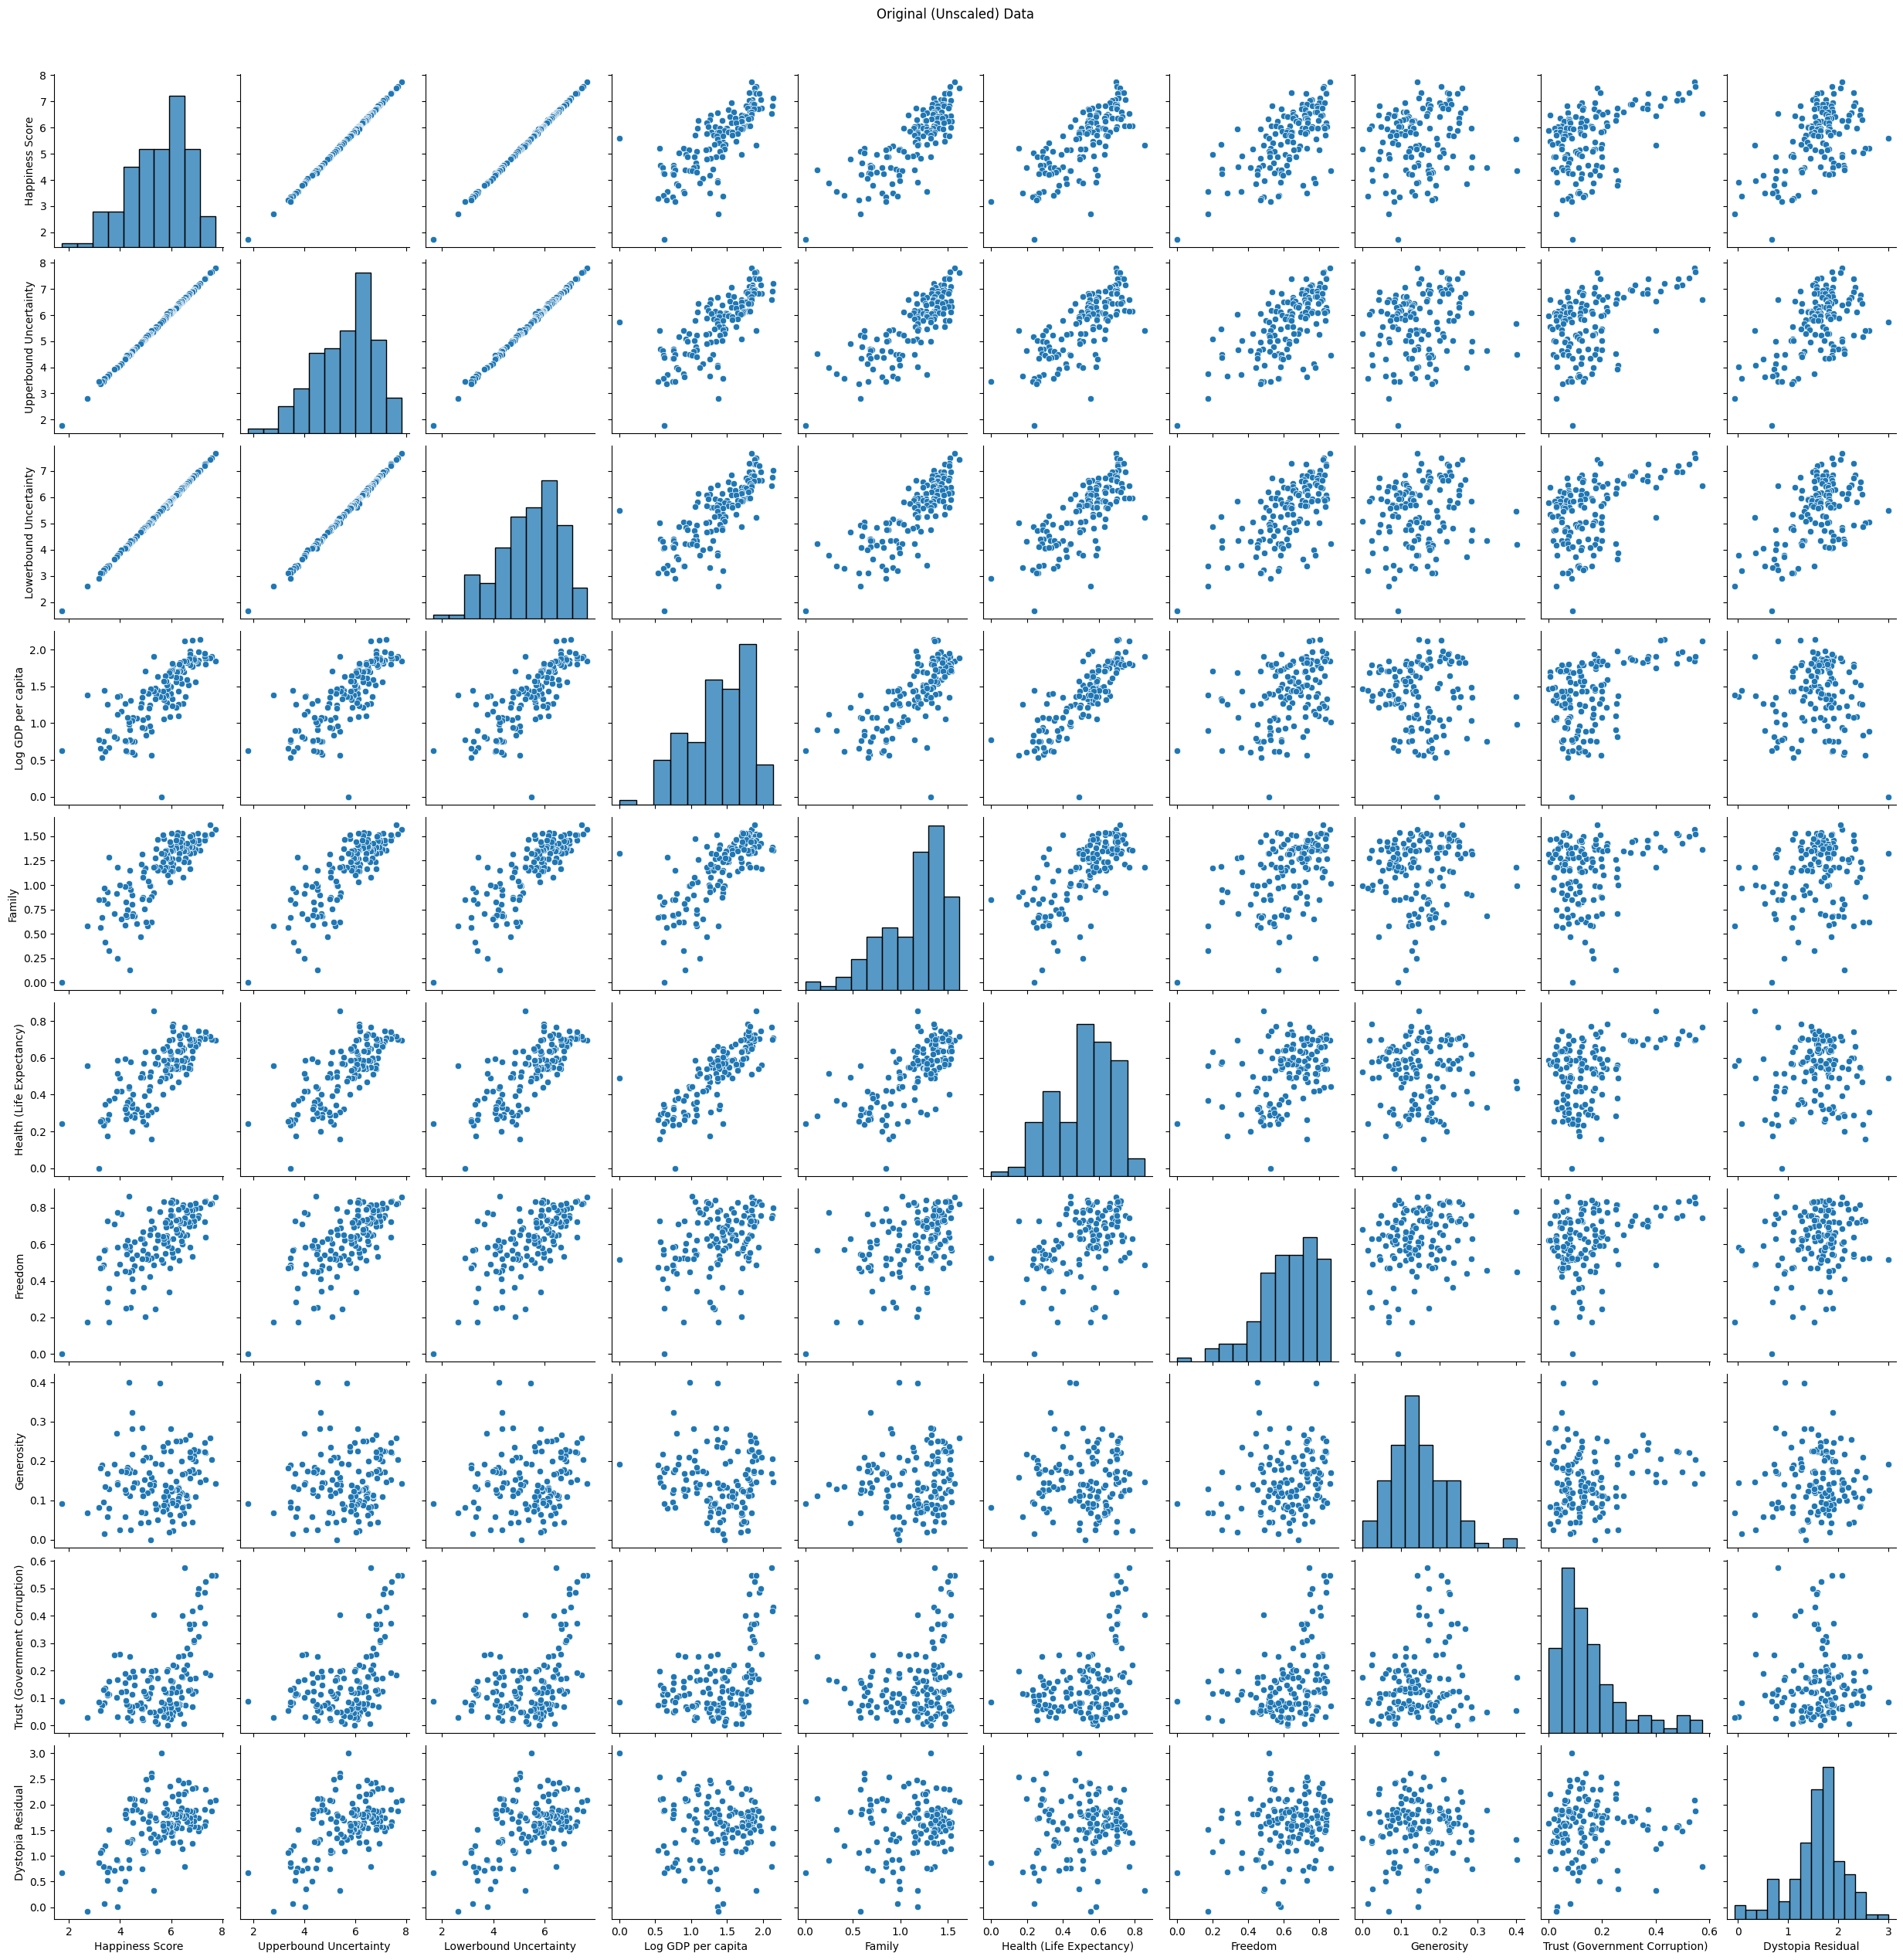

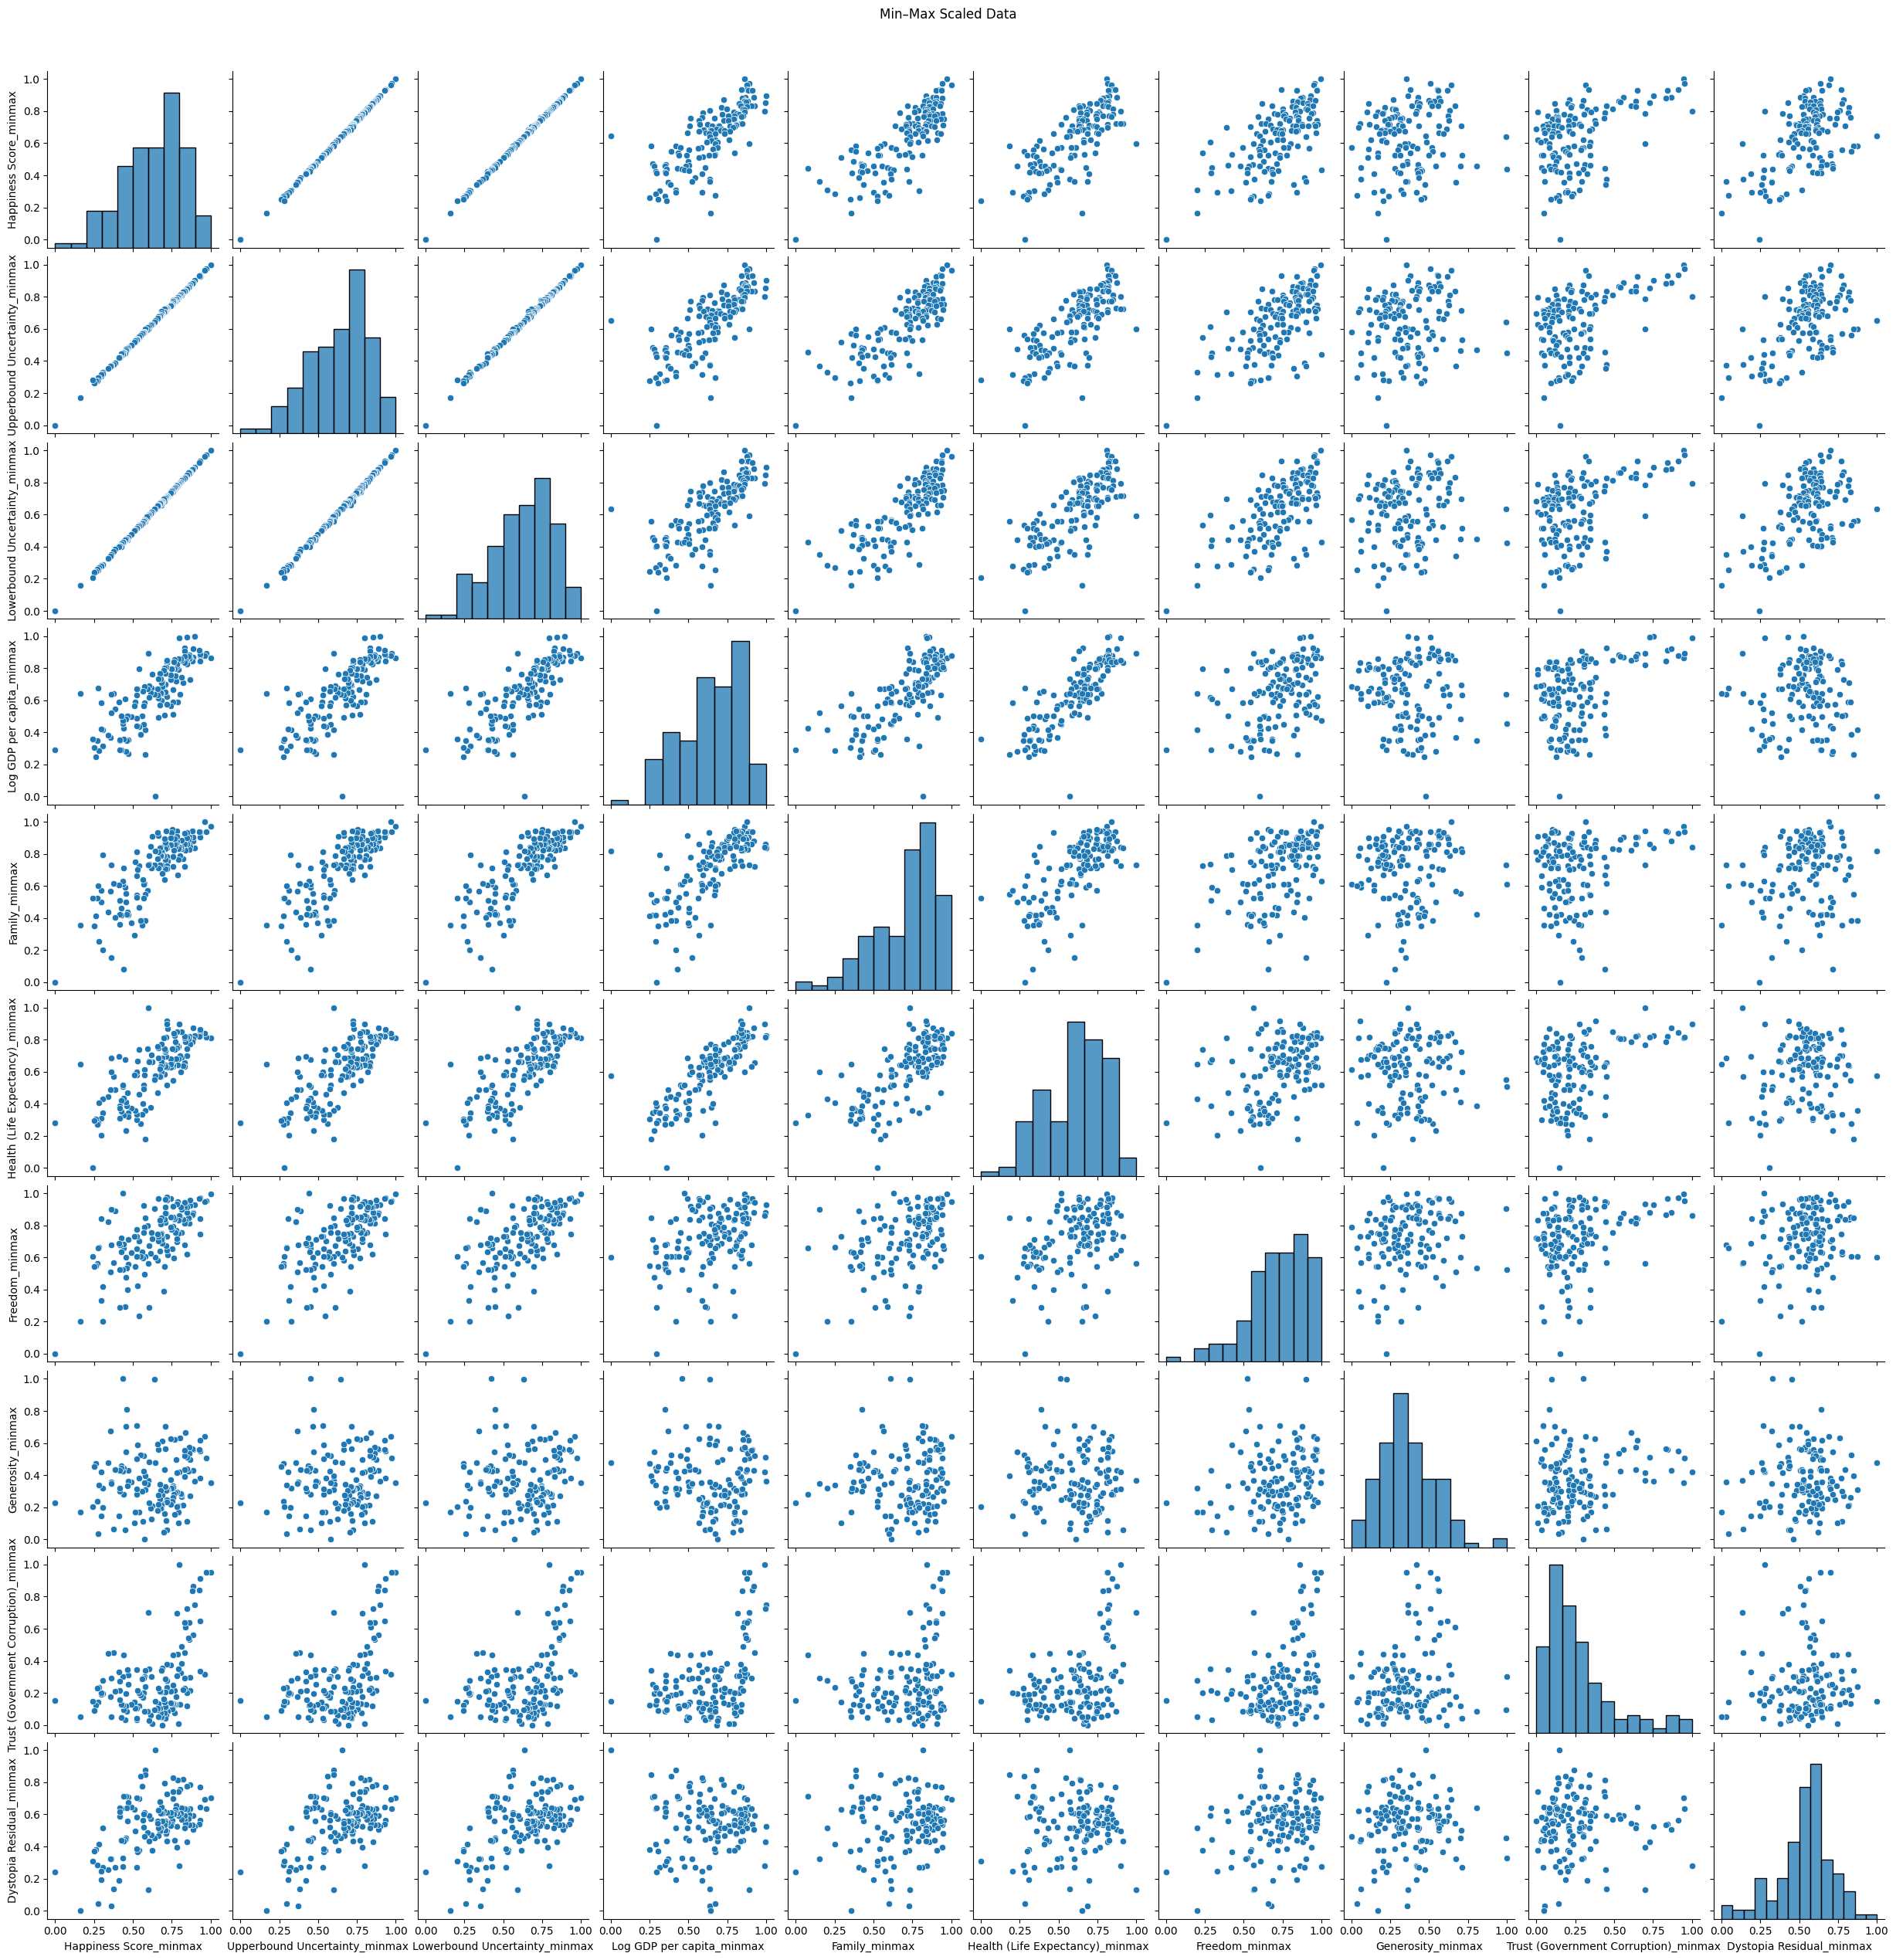

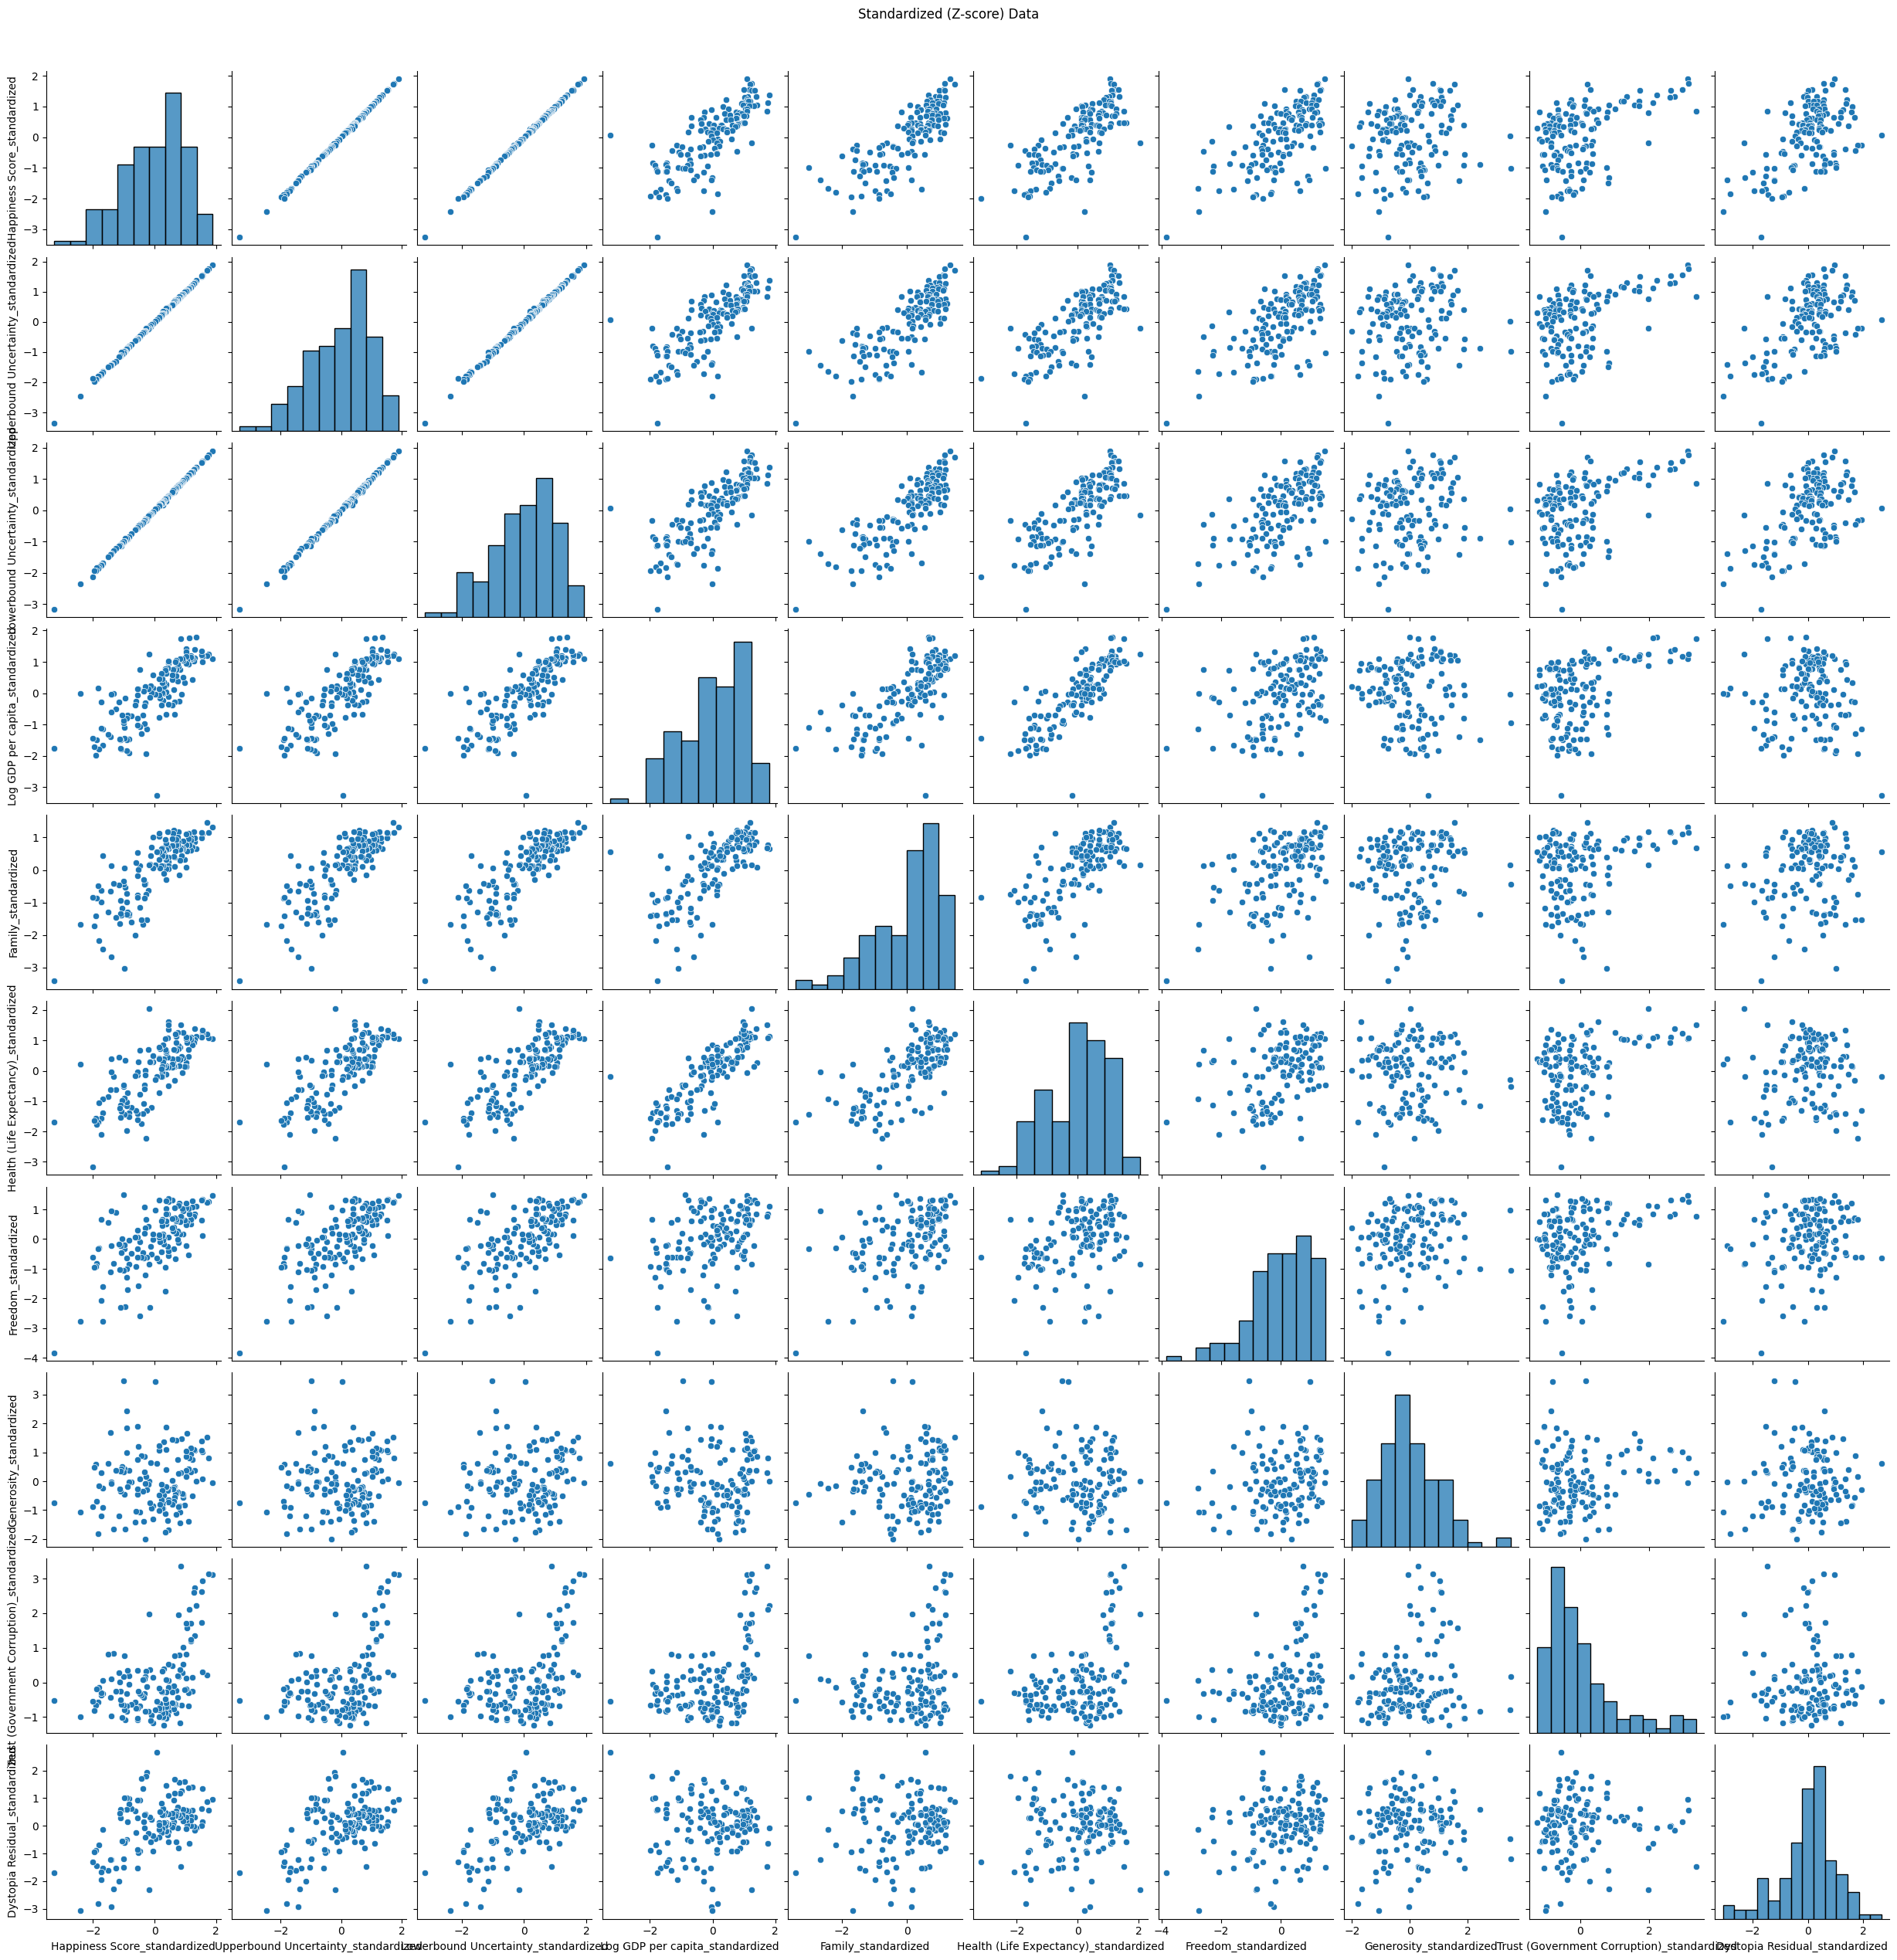

In [182]:


# 1️⃣ Original
sns.pairplot(df.select_dtypes(include='number'))
plt.suptitle("Original (Unscaled) Data", y=1.02)
plt.show()

# 2️⃣ Min–Max scaled
sns.pairplot(df_scaled_all.filter(like='_minmax'))
plt.suptitle("Min–Max Scaled Data", y=1.02)
plt.show()

# 3️⃣ Standardized
sns.pairplot(df_scaled_all.filter(like='_standardized'))
plt.suptitle("Standardized (Z-score) Data", y=1.02)
plt.show()


CAPTION: The figure shows scatter  plots indicating pairwise relationships between all numerical variables for original, min–max, and standardized data. The off-diagonal panels show scatter plots of one variable vs another while the diagonal panels show a single variable against itself. Each matrix visualizes how rescaling affects the variable ranges while preserving their relative relationships. The overall structure of the data remains consistent — scaling changes the axes but not the correlations, confirming this preprocessing works as intended.

**PART 2 : CLUSTERING**

In [183]:
#clustering is unsupervised — it doesn’t predict labels, it finds structure.

#task 5: Cluster the scaled numerical features into 3 clusters using K-Means.
#Use scaled features to find groups (clusters) of countries with similar happiness factors
#numerical features are
#Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'
#instead of predicting the score (supervised learning),
#we group countries by their overall similarity across these six features — an unsupervised problem
#K-Means uses Euclidean distance, which is sensitive to scale (we did it before)

#Each country is a data point xi = [Family_i, Health_i, ​Freedom_i, Trust_i, Generosity_i, Dystopia_i]
#K-Means tries to find 3 centroids (cluster centers) in this 6-dimensional space such that countries in the same cluster have similar profiles.
#The Algorithm:
#Choose K=3
#Randomly pick 3 initial centroids (each is a 6-dim vector).
#Assign each country to the nearest centroid using Euclidean distance.
#Recompute the centroids as the mean of all countries in each cluster.
#Repeat until cluster assignments stabilize.
#mathematically  we minimize the total within-cluster variance


In [184]:
# Task 5: KMeans Clustering on scaled features

# 1) Pick standardized feature columns for the chosen features
scaled_features = [
    'Family_standardized',
    'Health (Life Expectancy)_standardized',
    'Freedom_standardized',
    'Trust (Government Corruption)_standardized',
    'Generosity_standardized',
    'Dystopia Residual_standardized'
]

In [185]:
X = df_scaled[scaled_features] #X is the input for kmeans
print(X.isnull().sum()) #but has nan values!!

Family_standardized                           3
Health (Life Expectancy)_standardized         3
Freedom_standardized                          3
Trust (Government Corruption)_standardized    3
Generosity_standardized                       3
Dystopia Residual_standardized                3
dtype: int64


In [186]:
# 2) Build X and impute any NaNs (mean is fine on standardized data)
X = df_scaled[scaled_features]
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(
    imputer.fit_transform(X),
    columns=scaled_features,
    index=X.index
)

In [187]:
# 3) KMeans (fit ONCE) and attach labels
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_imputed)

df['Cluster'] = labels

In [188]:
# 4) Cluster centroids in standardized space
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=scaled_features)
display(centroids)

Family_standardized  Health (Life Expectancy)_standardized  \
0            -1.055774                              -0.992292   
1             0.475456                               0.366294   
2             0.865060                               1.073078   

   Freedom_standardized  Trust (Government Corruption)_standardized  \
0             -0.820092                                   -0.306403   
1              0.318881                                   -0.372222   
2              0.834729                                    1.897634   

   Generosity_standardized  Dystopia Residual_standardized  
0                -0.057823                       -0.397685  
1                -0.182740                        0.289846  
2                 0.721168                       -0.031584

The table you posted lists the cluster centroids — that is, the average standardized values of each feature for each of the 3 K-Means clusters.

Each value is measured in standardized units (mean = 0, std = 1), so:

Positive → above-average value for that feature (better condition).

Negative → below-average value for that feature (worse condition).



| Feature               | Positive means...                                                     | Negative means...                                               |
| --------------------- | --------------------------------------------------------------------- | --------------------------------------------------------------- |
| **Dystopia Residual** | People are happier than expected given material and social conditions | Happiness is low or fully explained by socioeconomic conditions |


Cluster 0 (–0.39): less happy, struggling nations.

Cluster 1 (+0.29): moderately happy or optimistic countries.

Cluster 2 (–0.03): highly developed nations — happy, but their happiness is fully explained by their strong measurable factors (so residual ≈ 0).

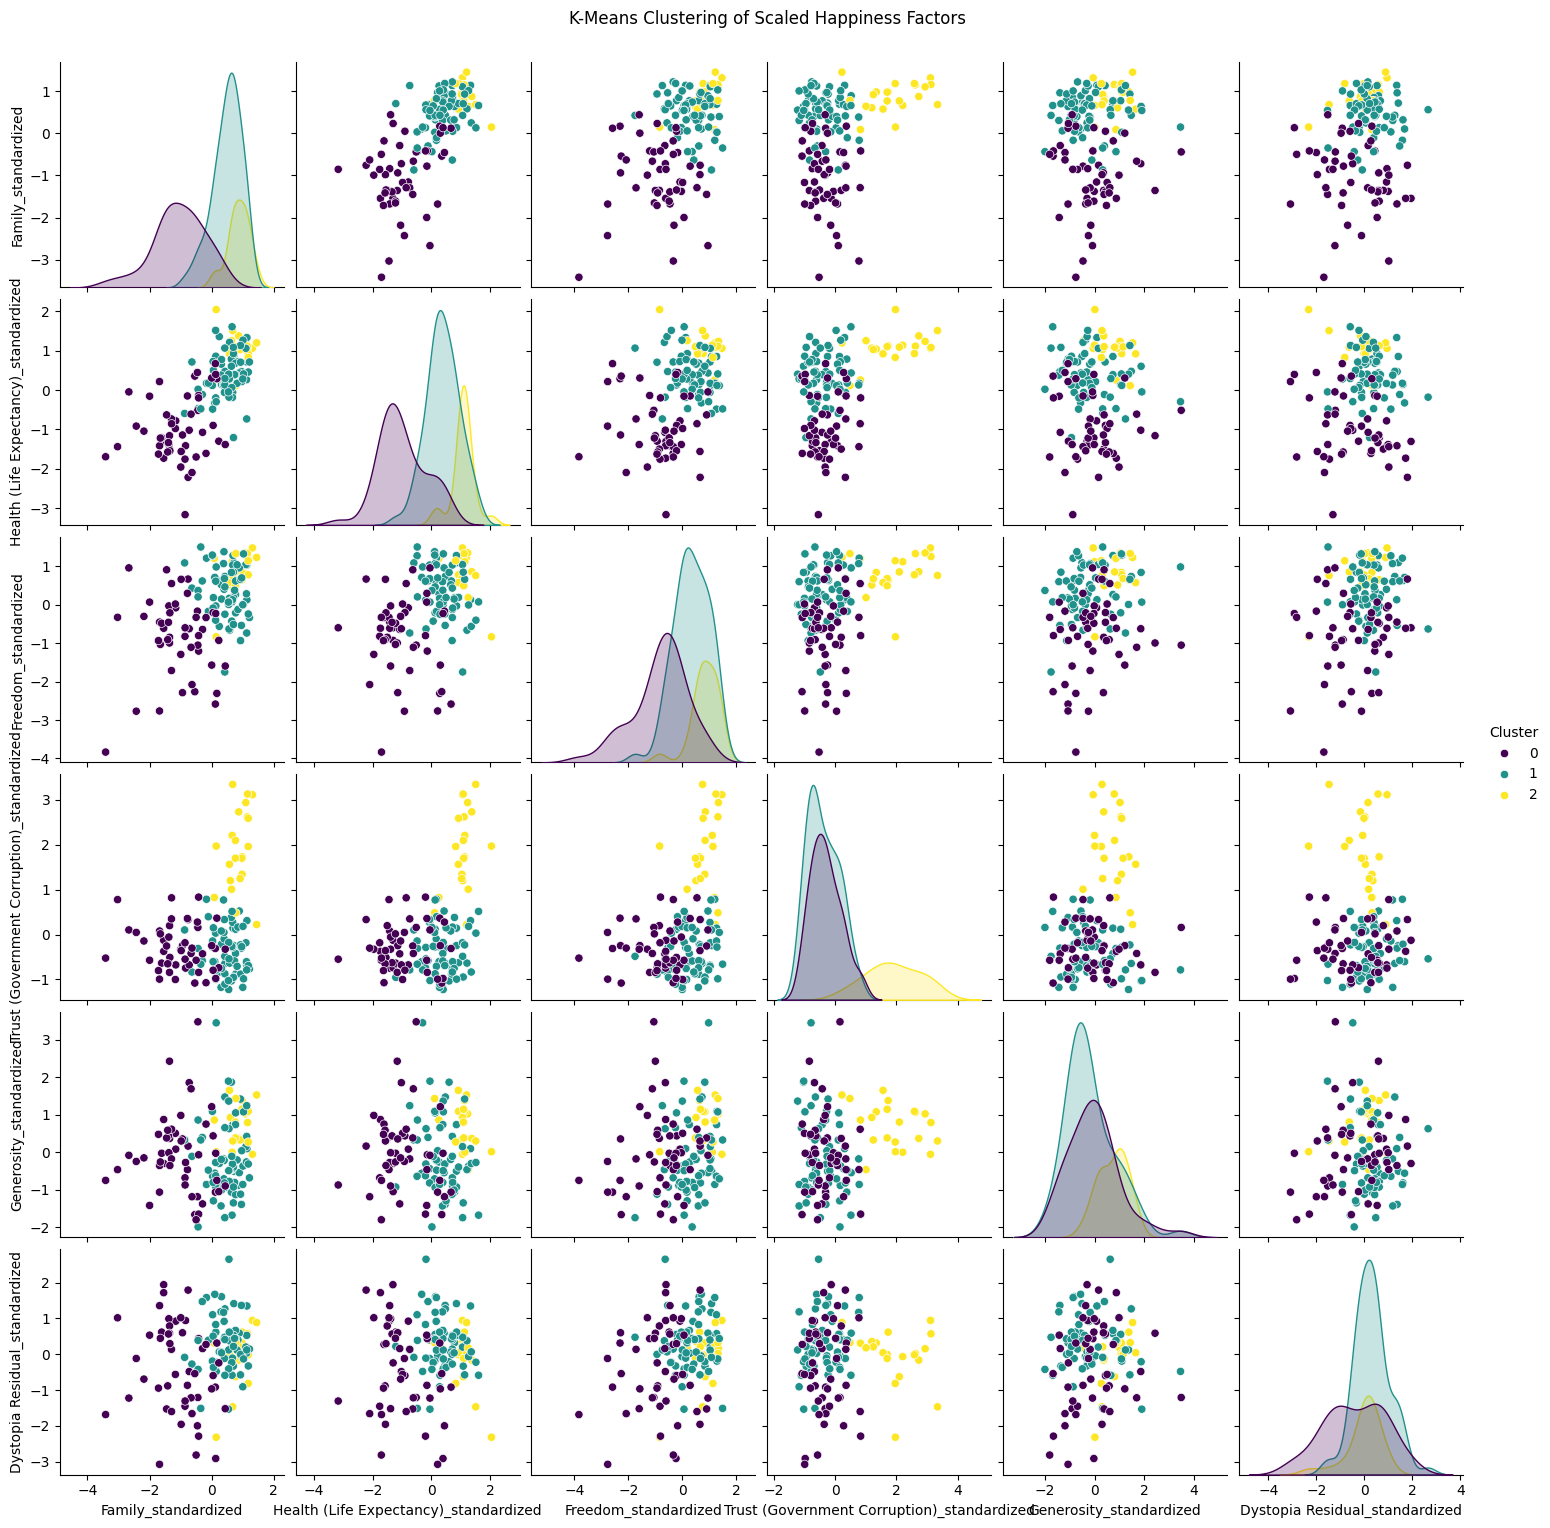

In [189]:
sns.pairplot(
    pd.concat([df_scaled[scaled_features], df['Cluster']], axis=1),
    hue='Cluster',
    palette='viridis'
)
plt.suptitle('K-Means Clustering of Scaled Happiness Factors', y=1.02)
plt.show()


CAPTION:  Given is a pairplot showing the results of K-Means clustering (K = 3) applied to the standardized socio-economic features that contribute to the Happiness Score: Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, and Dystopia Residual.

Countries were grouped into three clusters (yellow, blue, and violet) in standardized feature space, where nearby points represent nations with similar social and economic happiness factors.

 The color groups reveal meaningful global divisions—yellow points correspond mostly to developed countries with strong social support and health; blue points represent developing nations with moderate scores; and violet points indicate less-developed or lower-happiness countries characterized by weaker freedom, trust, and health indicators.

In [190]:
#task 6

# Add the cluster labels to both dataframes
df['Cluster'] = labels
df_scaled['Cluster'] = labels

assert 'Cluster' in df.columns
df

Country name            Regional indicator  Happiness Score  \
0             Finland                Western Europe            7.741   
1             Denmark                Western Europe            7.583   
2             Iceland                Western Europe            7.525   
3              Sweden                Western Europe            7.344   
4              Israel  Middle East and North Africa            7.341   
..                ...                           ...              ...   
138  Congo (Kinshasa)            Sub-Saharan Africa            3.295   
139      Sierra Leone            Sub-Saharan Africa            3.245   
140           Lesotho            Sub-Saharan Africa            3.186   
141           Lebanon  Middle East and North Africa            2.707   
142       Afghanistan                    South Asia            1.721   

     Upperbound Uncertainty  Lowerbound Uncertainty  Log GDP per capita  \
0                     7.815                   7.667               1.844   
1                     7.665                   7.500               1.908   
2                     7.618                   7.433               1.881   
3                     7.422                   7.267               1.878   
4                     7.405                   7.277               1.803   
..                      ...                     ...                 ...   
138                   3.462                   3.128               0.534   
139                   3.366                   3.124               0.654   
140                   3.469                   2.904               0.771   
141                   2.797                   2.616               1.377   
142                   1.775                   1.667               0.628   

     Family  Health (Life Expectancy)  Freedom  Generosity  \
0     1.572                     0.695    0.859       0.142   
1     1.520                     0.699    0.823       0.204   
2     1.617                     0.718    0.819       0.258   
3     1.501                     0.724    0.838       0.221   
4     1.513                     0.740    0.641       0.153   
..      ...                       ...      ...         ...   
138   0.665                     0.262    0.473       0.189   
139   0.566                     0.253    0.469       0.181   
140   0.851                     0.000    0.523       0.082   
141   0.577                     0.556    0.173       0.068   
142   0.000                     0.242    0.000       0.091   

     Trust (Government Corruption)  Dystopia Residual  Cluster  
0                            0.546              2.082        2  
1                            0.548              1.881        2  
2                            0.182              2.050        2  
3                            0.524              1.658        2  
4                            0.193              2.298        1  
..                             ...                ...      ...  
138                          0.072              1.102        0  
139                          0.053              1.068        0  
140                          0.085              0.875        0  
141                          0.029             -0.073        0  
142                          0.088              0.672        0  

[143 rows x 13 columns]

In [191]:
assert 'Cluster' in df_scaled.columns
df_scaled.head()

Country name  Happiness Score_minmax  Happiness Score_standardized  \
0      Finland                1.000000                      1.897299   
1      Denmark                0.973754                      1.761865   
2      Iceland                0.964120                      1.712148   
3       Sweden                0.934053                      1.556999   
4       Israel                0.933555                      1.554427   

   Upperbound Uncertainty_minmax  Upperbound Uncertainty_standardized  \
0                       1.000000                             1.888702   
1                       0.975166                             1.758376   
2                       0.967384                             1.717541   
3                       0.934934                             1.547249   
4                       0.932119                             1.532478   

   Lowerbound Uncertainty_minmax  Lowerbound Uncertainty_standardized  \
0                       1.000000                             1.904544   
1                       0.972167                             1.763375   
2                       0.961000                             1.706738   
3                       0.933333                             1.566414   
4                       0.935000                             1.574867   

   Log GDP per capita_minmax  Log GDP per capita_standardized  Family_minmax  \
0                   0.861280                         1.098248       0.972171   
1                   0.891172                         1.249342       0.940012   
2                   0.878561                         1.185599       1.000000   
3                   0.877160                         1.178516       0.928262   
4                   0.842130                         1.001453       0.935683   

   ...  Health (Life Expectancy)_standardized  Freedom_minmax  \
0  ...                               1.059525        0.995365   
1  ...                               1.083865        0.953650   
2  ...                               1.199485        0.949015   
3  ...                               1.235996        0.971031   
4  ...                               1.333360        0.742758   

   Freedom_standardized  Generosity_minmax  Generosity_standardized  \
0              1.472287           0.354115                -0.058370   
1              1.249941           0.508728                 0.788873   
2              1.225236           0.643392                 1.526794   
3              1.342585           0.551122                 1.021182   
4              0.125863           0.381546                 0.091947   

   Trust (Government Corruption)_minmax  \
0                              0.949565   
1                              0.953043   
2                              0.316522   
3                              0.911304   
4                              0.335652   

   Trust (Government Corruption)_standardized  Dystopia Residual_minmax  \
0                                    3.115426                  0.701726   
1                                    3.131326                  0.636275   
2                                    0.221634                  0.691306   
3                                    2.940526                  0.563660   
4                                    0.309084                  0.772061   

   Dystopia Residual_standardized  Cluster  
0                        0.945009        2  
1                        0.569683        2  
2                        0.885255        2  
3                        0.153278        2  
4                        1.348343        1  

[5 rows x 22 columns]

In [192]:
#df.tail(10)

In [193]:
upper = next((c for c in ['Upperbound Uncertainty_standardized'] if c in df_scaled.columns), None)
lower = next((c for c in ['Lowerbound Uncertainty_standardized'] if c in df_scaled.columns), None)

In [194]:
upper = next((c for c in ['Upperbound Uncertainty_standardized'] if c in df_scaled.columns), None)
lower = next((c for c in ['Lowerbound Uncertainty_standardized'] if c in df_scaled.columns), None)
yerr = np.vstack([
        df_scaled['Happiness Score_standardized'] - df_scaled[lower],
        df_scaled[upper] - df_scaled['Happiness Score_standardized']
    ])
# Jitter x a bit so points in the same cluster don't overlap
x = df_scaled['Cluster'].to_numpy()
rng = np.random.default_rng(0)
xj = x + (rng.random(len(x)) - 0.5) * 0.18

In [195]:
yerr = np.abs(np.vstack([
    df_scaled['Happiness Score_standardized'] - df_scaled[lower],
    df_scaled[upper] - df_scaled['Happiness Score_standardized']
]))

#compute both sides of the uncertainty: the distance from the central score to the lower and upper bounds.

| Concept                    | Meaning                                                      | Effect on Plot                                     |
| -------------------------- | ------------------------------------------------------------ | -------------------------------------------------- |
| **Upperbound Uncertainty** | Upper end of 95% confidence interval                         | Top of the vertical error bar                      |
| **Lowerbound Uncertainty** | Lower end of 95% confidence interval                         | Bottom of the vertical error bar                   |
| **Error bar height**       | Width between upper and lower bounds                         | Shows how uncertain the country’s score is         |
| **Interpretation**         | Narrow bars → reliable data; wide bars → uncertain estimates | Makes differences between clusters more meaningful |


In [196]:
# Jitter x a bit so points in the same cluster don't overlap
x = df_scaled['Cluster'].to_numpy()
rng = np.random.default_rng(0)
xj = x + (rng.random(len(x)) - 0.5) * 0.18

Plotting standardized happiness with error bars
The plot is conceptually correct:

X-axis → Cluster index (0, 1, 2)

Y-axis → Standardized Happiness Score

Error bars → Uncertainty range per country

In [197]:
"""
plt.figure(figsize=(7,4))
plt.errorbar(xj, df_scaled['Happiness Score_standardized'] , yerr, fmt='o',  ms=5, alpha=0.7, capsize=3, ecolor='red')
plt.xticks([0,1,2], [0,1,2])
plt.xlabel('Cluster')
plt.ylabel('Happiness Score_standardized')
plt.title('Happiness Score_standardized by Cluster (per country, with error bars)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
"""

"\nplt.figure(figsize=(7,4))\nplt.errorbar(xj, df_scaled['Happiness Score_standardized'] , yerr, fmt='o',  ms=5, alpha=0.7, capsize=3, ecolor='red')\nplt.xticks([0,1,2], [0,1,2])\nplt.xlabel('Cluster')\nplt.ylabel('Happiness Score_standardized')\nplt.title('Happiness Score_standardized by Cluster (per country, with error bars)')\nplt.grid(True, alpha=0.3)\nplt.tight_layout()\nplt.show()\n"

In [198]:
"""
#for original, notscaled data
upper = 'Upperbound Uncertainty'
lower = 'Lowerbound Uncertainty'
yerr = np.vstack([
    df['Happiness Score'] - df[lower],
    df[upper] - df['Happiness Score']
])
plt.errorbar(
    xj,
    df['Happiness Score'],
    yerr=yerr,
    fmt='o', alpha=0.7, capsize=3, ecolor='red',
)
plt.ylabel('Happiness Score')
"""

"\n#for original, notscaled data\nupper = 'Upperbound Uncertainty'\nlower = 'Lowerbound Uncertainty'\nyerr = np.vstack([\n    df['Happiness Score'] - df[lower],\n    df[upper] - df['Happiness Score']\n])\nplt.errorbar(\n    xj,\n    df['Happiness Score'],\n    yerr=yerr,\n    fmt='o', alpha=0.7, capsize=3, ecolor='red',\n)\nplt.ylabel('Happiness Score')\n"

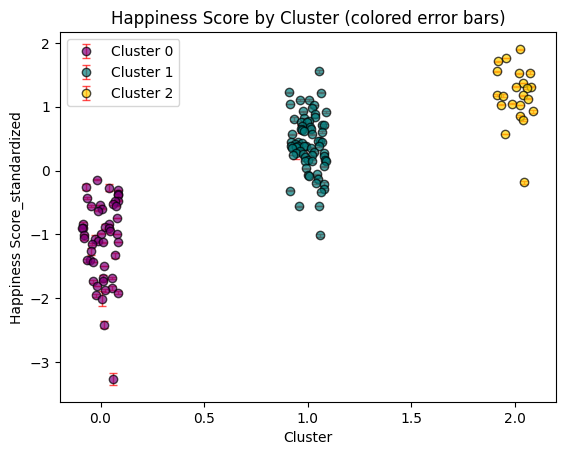

In [199]:
import matplotlib.colors as mcolors

colors = ['purple', 'teal', 'gold']  # match viridis-style palette
for c, color in zip(sorted(df_scaled['Cluster'].unique()), colors):
    mask = df_scaled['Cluster'] == c
    plt.errorbar(
        xj[mask],
        df_scaled.loc[mask, 'Happiness Score_standardized'],
        yerr[:, mask],
        fmt='o',
        alpha=0.7,
        ecolor=mcolors.CSS4_COLORS['red'],
        mfc=color,
        mec='black',
        elinewidth=1,
        capsize=3,
        label=f'Cluster {c}'
    )
plt.legend()
plt.xlabel('Cluster')
plt.ylabel('Happiness Score_standardized')
plt.title('Happiness Score by Cluster (colored error bars)')
plt.show()

Caption: Scatter plot of the standardized Happiness Score for each country, grouped by K-Means cluster (K = 3). Each point represents one country, and each vertical error bar shows the full uncertainty range (upper–lower) of that country’s happiness score — illustrating how confident we are in each reported value. A wider gap between bounds indicates greater uncertainty.
Purple (Cluster 0) countries have low standardized happiness scores (around –2 to –1) with slightly larger but consistent error bars, reflecting uniformly low happiness with modest uncertainty.
Teal-blue (Cluster 1) countries occupy the middle range (–0.5 to +1) and display moderate uncertainty, overlapping with adjacent clusters.
Yellow (Cluster 2) countries reach the highest scores (around +1 to +2) with shorter error bars, indicating more reliable estimates.
Overall, the figure shows that as mean happiness increases, the uncertainty in those scores generally decreases, revealing a clear separation between low-, medium-, and high-happiness nations.